In [18]:
import numpy as np
import matplotlib.pylab as plt

kernel=str(101)
tipo="strong"

out_mpi=[]
f=open('time_'+tipo+'_earth_mpi'+kernel, "r")
file=f.readlines()
f.close()
summ=0
count=1
for i in range(len(file)):
    if( file[i][0]=='#' ):
        out_mpi.append(summ/count)
        summ=0
        count=0
        continue
    summ += float(file[i][4:]) 
    count += 1
out_mpi.append(summ/count)
out_mpi.remove(0)
out_mpi=np.asarray(out_mpi)

P=[]
out_opm=[]
f=open('time_'+tipo+'_earth_opm'+kernel, "r")
file=f.readlines()
f.close()
for i in range(len(file)):
    if( file[i][0]!='#'):
        out_opm.append(float(file[i][0:]))
    else:
        tmp = file[i].replace("#####", "")
        tmp = tmp.replace("threads", "")
        P.append(int(tmp))
out_opm=np.asarray(out_opm)
P=np.asarray(P)

S_mpi=out_mpi[0]/out_mpi
S_opm=out_opm[0]/out_opm

In [19]:
kernel=str(11)
tipo="strong"

out_mpi=[]
f=open('time_'+tipo+'_earth_mpi'+kernel, "r")
file=f.readlines()
f.close()
summ=0
count=1
for i in range(len(file)):
    if( file[i][0]=='#' ):
        out_mpi.append(summ/count)
        summ=0
        count=0
        continue
    summ += float(file[i][4:]) 
    count += 1
out_mpi.append(summ/count)
out_mpi.remove(0)
out_mpi=np.asarray(out_mpi)

P=[]
out_opm=[]
f=open('time_'+tipo+'_earth_opm'+kernel, "r")
file=f.readlines()
f.close()
for i in range(len(file)):
    if( file[i][0]!='#'):
        out_opm.append(float(file[i][0:]))
    else:
        tmp = file[i].replace("#####", "")
        tmp = tmp.replace("threads", "")
        P.append(int(tmp))
out_opm=np.asarray(out_opm)
P=np.asarray(P)

S_mpi1=out_mpi[0]/out_mpi
S_opm1=out_opm[0]/out_opm

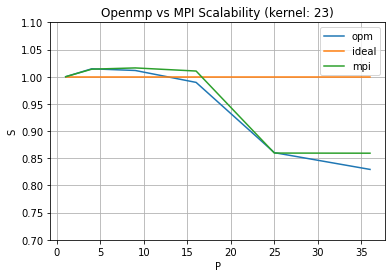

In [20]:
if(tipo=="strong"):
    N=13
else:
    N=6

_=plt.plot(P[0:N],S_opm[0:N], label='opm')
if (tipo=="strong"):
    _=plt.plot(P[0:N],P[0:N], label='ideal')
else:
    _=plt.plot(P[0:N],np.ones((len(P[0:N]))), label='ideal')
    _=plt.ylim(0.7,1.1)
_=plt.plot(P[0:N],S_mpi, label='mpi')
_=plt.legend() ; _=plt.xlabel("P") ; _=plt.ylabel("S")
_=plt.title("Openmp vs MPI Scalability (kernel: "+kernel+")")
_=plt.grid()

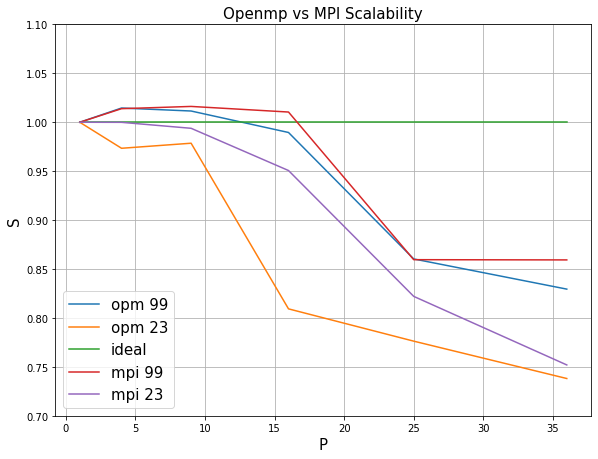

In [22]:
if(tipo=="strong"):
    N=13
else:
    N=6
    
fs=15
x=6.4
y=4.8

_=plt.figure(figsize=(1.5*x,1.5*y))
_=plt.plot(P[0:N],S_opm[0:N], label='opm 99')
_=plt.plot(P[0:N],S_opm1[0:N], label='opm 23')
if (tipo=="strong"):
    _=plt.plot(P[0:N],P[0:N], label='ideal')
else:
    _=plt.plot(P[0:N],np.ones((len(P[0:N]))), label='ideal')
    _=plt.ylim(0.7,1.1)
_=plt.plot(P[0:N],S_mpi, label='mpi 99')
_=plt.plot(P[0:N],S_mpi1, label='mpi 23')
_=plt.legend(fontsize=fs) ; _=plt.xlabel("P",fontsize=fs) ; _=plt.ylabel("S",fontsize=fs)
_=plt.title("Openmp vs MPI Scalability", fontsize=fs)
_=plt.grid()

In [ ]:
_=plt.plot(P,S_opm, label='data')
if (tipo=="strong"):
    _=plt.plot(P,P, label='ideal')
    hyp=48
    extra=2
else:
    _=plt.plot(P,np.ones((len(P))), label='ideal')
    hyp=36
    extra=0.2
var=max(S_opm)+extra
#var=40
_=plt.vlines(hyp,0,var, linestyle='dashed', colors='r', label='Hyper-threading')
_=plt.legend() ; _=plt.xlabel("P") ; _=plt.ylabel("S")
_=plt.ylim(0,var)
_=plt.title("Openmp Scalability (kernel: "+kernel+")")
_=plt.grid()